In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pickle
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
# District-by-district AP data for the five years 2018/19 to 2022/23
wisconsin_districts = pd.read_csv('../data/Wisconsin/Wisconsin_with districts.csv')

In [4]:
wisconsin_districts

,Unnamed: 0,COUNTY,STUDENTS_TESTED,EXAM_COUNT,EXAMS_3_OR_ABOVE,DISTRICT_NAME,Year,PERCENT_3_OR_ABOVE,LATITUDE,LONGITUDE
0,0,Adams,45,76,22,Adams-Friendship Area,2018,28.947368,44.019695,-89.775534
1,1,Green,6,7,4,Albany,2018,57.142857,42.707785,-89.437063
2,2,Kewaunee,21,21,9,Algoma,2018,42.857143,44.608888,-87.432589
3,3,Portage,7,8,5,Almond-Bancroft,2018,62.500000,44.284011,-89.360630
4,4,Eau Claire,64,107,79,Altoona,2018,73.831776,44.804682,-91.443215
...,...,...,...,...,...,...,...,...,...,...
1485,1485,Dane,38,72,52,Wisconsin Heights,2022,72.222222,43.135655,-89.737996
1486,1486,Wood,117,155,105,Wisconsin Rapids,2022,67.741935,44.383576,-89.817346
1487,1487,Shawano,12,19,8,Wittenberg-Birnamwood,2022,42.105263,44.810379,-89.208677
1488,1488,Juneau,6,7,3,Wonewoc-Union Center,2022,42.857143,43.656537,-90.205711


In [24]:
# AP-related columns
ap_columns = ['STUDENTS_TESTED','EXAM_COUNT','EXAMS_3_OR_ABOVE','PERCENT_3_OR_ABOVE']
wisconsin_districts[ap_columns].describe()

,STUDENTS_TESTED,EXAM_COUNT,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE
count,1490.000000,1490.000000,1490.000000,1490.000000
mean,141.808054,234.961745,153.724832,56.698006
std,215.330179,380.641240,261.921614,17.918374
min,6.000000,6.000000,0.000000,0.000000
25%,22.000000,30.250000,14.000000,46.009702
50%,55.000000,81.000000,46.500000,59.277871
75%,168.000000,266.750000,165.000000,70.203434
max,1853.000000,3234.000000,2337.000000,94.444444


In [25]:
# Separate each year. We will mostly do exploratory data visualization for the latest year 2022/23.
wisconsin_districts18 = wisconsin_districts[wisconsin_districts['Year'] == 2018]
wisconsin_districts19 = wisconsin_districts[wisconsin_districts['Year'] == 2019]
wisconsin_districts20 = wisconsin_districts[wisconsin_districts['Year'] == 2020]
wisconsin_districts21 = wisconsin_districts[wisconsin_districts['Year'] == 2021]
wisconsin_districts22 = wisconsin_districts[wisconsin_districts['Year'] == 2022]

In [26]:
wisconsin_districts22

,Unnamed: 0,COUNTY,STUDENTS_TESTED,EXAM_COUNT,EXAMS_3_OR_ABOVE,DISTRICT_NAME,Year,PERCENT_3_OR_ABOVE,LATITUDE,LONGITUDE
1192,1192,Adams,42,79,22,Adams-Friendship Area,2022,27.848101,44.019695,-89.775534
1193,1193,Kewaunee,12,12,4,Algoma,2022,33.333333,44.608888,-87.432589
1194,1194,Eau Claire,68,97,77,Altoona,2022,79.381443,44.804682,-91.443215
1195,1195,Polk,64,76,35,Amery,2022,46.052632,45.306906,-92.362137
1196,1196,Langlade,52,68,30,Antigo Unified,2022,44.117647,45.140245,-89.152335
...,...,...,...,...,...,...,...,...,...,...
1485,1485,Dane,38,72,52,Wisconsin Heights,2022,72.222222,43.135655,-89.737996
1486,1486,Wood,117,155,105,Wisconsin Rapids,2022,67.741935,44.383576,-89.817346
1487,1487,Shawano,12,19,8,Wittenberg-Birnamwood,2022,42.105263,44.810379,-89.208677
1488,1488,Juneau,6,7,3,Wonewoc-Union Center,2022,42.857143,43.656537,-90.205711


In [42]:
wisconsin_districts22[ap_columns].describe()

,STUDENTS_TESTED,EXAM_COUNT,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE
count,298.000000,298.000000,298.000000,298.000000
mean,145.526846,239.365772,158.479866,57.885901
std,225.095388,397.261692,276.910021,18.352270
min,6.000000,6.000000,0.000000,0.000000
25%,22.000000,31.250000,15.000000,47.632890
50%,60.500000,85.000000,51.500000,60.275689
75%,163.000000,246.750000,153.500000,72.174880
max,1853.000000,3137.000000,2337.000000,93.877551


In [28]:
# Open street heat map showing ap pass rate by school district in Wisconsin. Also, save the figure as a pickle file.

fig = px.density_mapbox(wisconsin_districts22, lat='LATITUDE', lon='LONGITUDE', z='PERCENT_3_OR_ABOVE', radius=10,
                        center=dict(lat=44.8, lon=-89), zoom=5,
                        mapbox_style="open-street-map")
fig.update_layout(
    title='2022-23: AP Scores 3-5 by school districts of Wisconsin'
)

fig.show()
with open('../data/WI_pickled/WI_AP_pass_rate_by_school_districts.pkl', 'wb') as f:
    pickle.dump(fig, f)

### We can see a sizeable bright orange/yellow spot around Milwaukee-Madison region. That region has considerably high density of notable universities (like University of Wisconsin-Madison and Milwaukee). However, that region is also probably richer on average than other school districts.

In [29]:
# This is now county-by-county data we created in working_with_wisconsin.ipynb file (same code is rewritten in wisconsin_data_processing.py)
wisconsin = pd.read_csv('../data/Wisconsin/train_test_split/Wisconsin_closest_five_method.csv')

In [30]:
wisconsin = wisconsin[wisconsin.columns[1:]]
wisconsin.columns

Index(['COUNTY', 'STUDENTS_TESTED', 'EXAM_COUNT', 'EXAMS_3_OR_ABOVE',
       'PERCENT_3_OR_ABOVE', 'Year', 'Latitude', 'Longitude', 'population',
       'per_capita_income', 'closest_five_r1r2_avg', 'closest_five_public_avg',
       'closest_five_private_nfp_avg', 'closest_five_landgrnt_avg',
       'closest_five_stem_avg', 'closest_five_avg_enrollment_r1r2',
       'closest_five_avg_enrollment_public',
       'closest_five_avg_enrollment_private_nfp',
       'closest_five_avg_enrollment_landgrnt',
       'closest_five_avg_enrollment_stem', 'closest_five_avg_dormrooms_r1r2',
       'closest_five_avg_dormrooms_public',
       'closest_five_avg_dormrooms_private_nfp',
       'closest_five_avg_dormrooms_landgrant',
       'closest_five_avg_dormrooms_stem'],
      dtype='object')

In [31]:
# Again, pick out academic year 2022/23 for data visualization
wisconsin22 = wisconsin[wisconsin['Year'] == 2022]

In [32]:
# non-AP related numeric coulumns:
features = wisconsin.columns[8:]
wisconsin[features].describe()

,population,per_capita_income,closest_five_r1r2_avg,closest_five_public_avg,closest_five_private_nfp_avg,closest_five_landgrnt_avg,closest_five_stem_avg,closest_five_avg_enrollment_r1r2,closest_five_avg_enrollment_public,closest_five_avg_enrollment_private_nfp,closest_five_avg_enrollment_landgrnt,closest_five_avg_enrollment_stem,closest_five_avg_dormrooms_r1r2,closest_five_avg_dormrooms_public,closest_five_avg_dormrooms_private_nfp,closest_five_avg_dormrooms_landgrant,closest_five_avg_dormrooms_stem
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,84118.237822,51607.704871,133.942014,38.137411,55.459307,133.997867,118.760944,30275.980516,10556.748997,2240.342120,20602.657880,23478.330659,5756.671060,1234.764470,775.106017,3826.834384,4401.001719
std,136112.206021,8475.499791,48.135951,12.063226,28.742544,16.967882,44.321314,4180.728416,5036.860343,772.276232,8690.157359,4212.718943,705.350761,858.141925,214.961041,2496.772344,749.677504
min,6015.000000,38342.000000,40.456215,11.268191,3.024497,99.772139,30.361166,22836.200000,1840.600000,1043.400000,9798.800000,14895.600000,4119.000000,19.200000,396.000000,1502.800000,3553.800000
25%,19975.000000,46216.000000,96.378027,27.989577,29.166080,120.621578,91.239233,27064.000000,7159.200000,1646.000000,13358.400000,20823.800000,5328.000000,588.400000,580.600000,1774.200000,3910.400000
50%,41988.000000,50097.000000,139.286521,36.641408,52.579970,137.519270,123.753367,28789.000000,9741.800000,2079.000000,22515.600000,23576.200000,5696.800000,1036.200000,797.000000,3257.000000,4383.400000
75%,91288.000000,54844.000000,172.947098,46.052501,77.567614,148.193839,153.986123,32411.800000,13718.000000,2858.800000,29555.600000,24446.600000,5947.000000,1947.600000,953.200000,5587.600000,4480.600000
max,942669.000000,99817.000000,217.467712,63.197539,112.572378,165.243556,196.467183,39068.400000,22050.400000,4055.000000,41983.000000,36552.600000,7978.600000,3128.600000,1338.600000,11083.400000,6919.600000


In [33]:
wisconsin22[features].describe()

,population,per_capita_income,closest_five_r1r2_avg,closest_five_public_avg,closest_five_private_nfp_avg,closest_five_landgrnt_avg,closest_five_stem_avg,closest_five_avg_enrollment_r1r2,closest_five_avg_enrollment_public,closest_five_avg_enrollment_private_nfp,closest_five_avg_enrollment_landgrnt,closest_five_avg_enrollment_stem,closest_five_avg_dormrooms_r1r2,closest_five_avg_dormrooms_public,closest_five_avg_dormrooms_private_nfp,closest_five_avg_dormrooms_landgrant,closest_five_avg_dormrooms_stem
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,85180.144928,56293.579710,133.193380,37.846859,54.863558,134.264916,117.979932,30251.217391,10657.805797,2240.373913,20686.649275,23467.104348,5757.365217,1248.857971,776.162319,3853.779710,4406.689855
std,136668.625750,8800.534456,48.186828,11.894176,28.533323,16.981449,44.233428,4223.204837,5006.272095,781.308952,8756.208494,4260.682992,713.570866,857.991700,217.248059,2513.219445,756.555217
min,7410.000000,44696.000000,40.456215,11.268191,3.024497,99.772139,30.361166,22836.200000,2797.400000,1043.400000,9798.800000,14895.600000,4119.000000,56.600000,396.000000,1502.800000,3553.800000
25%,20623.000000,51281.000000,96.378027,27.989577,29.166080,121.250779,91.239233,27064.000000,7454.200000,1646.000000,13358.400000,20823.800000,5328.000000,588.400000,580.600000,1774.200000,3910.400000
50%,42532.000000,54474.000000,139.286521,36.641408,52.579970,137.519270,123.753367,28789.000000,9741.800000,2079.000000,22515.600000,23576.200000,5696.800000,1036.200000,797.000000,3257.000000,4383.400000
75%,93009.000000,58999.000000,172.113345,45.942342,73.975050,148.193839,152.475044,32411.800000,13718.000000,2858.800000,29555.600000,24446.600000,5947.000000,1947.600000,953.200000,5587.600000,4480.600000
max,918661.000000,99817.000000,217.467712,62.173402,112.572378,165.243556,196.467183,39068.400000,22050.400000,4055.000000,41983.000000,36552.600000,7978.600000,3128.600000,1338.600000,11083.400000,6919.600000


In [36]:
# AP-related columns:
wisconsin[ap_columns].describe()

,STUDENTS_TESTED,EXAM_COUNT,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE
count,349.000000,349.000000,349.000000,349.000000
mean,605.426934,1003.131805,656.303725,57.504283
std,1201.658551,2098.551847,1433.530492,13.355695
min,7.000000,7.000000,3.000000,11.111111
25%,71.000000,92.000000,43.000000,50.793651
50%,164.000000,251.000000,151.000000,59.173127
75%,609.000000,1045.000000,630.000000,67.275281
max,6586.000000,11729.000000,8537.000000,93.750000


In [37]:
wisconsin22[ap_columns].describe()

,STUDENTS_TESTED,EXAM_COUNT,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE
count,69.000000,69.000000,69.000000,69.000000
mean,628.507246,1033.782609,684.449275,59.574930
std,1274.675779,2222.064507,1527.338771,13.447080
min,15.000000,15.000000,9.000000,27.848101
25%,77.000000,94.000000,46.000000,52.545825
50%,166.000000,260.000000,171.000000,60.575540
75%,614.000000,986.000000,630.000000,69.825119
max,6439.000000,11372.000000,8537.000000,86.666667


In [44]:
#for feature in features:
    #sns.lmplot(data=wisconsin22,x=feature,y='PERCENT_3_OR_ABOVE')

### Because there are so many features in our dataframe, we have commented out the code creating the target vs feature plot for each of the features to save space. However, we can see from the plots (and their corresponding trendlines) that the pass rate has the strongest relationship with per capita income, and then distance to public universities.

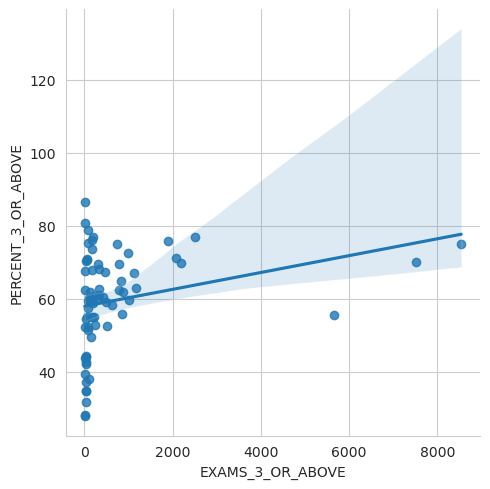

In [45]:
sns.lmplot(data=wisconsin22,x='EXAMS_3_OR_ABOVE',y='PERCENT_3_OR_ABOVE')

### We ended up not using any of 'STUDENTS_TESTED', 'EXAM_COUNT' and 'EXAMS_3_OR_ABOVE' as features in our statistical analysis and machine learning for two reasons: one, they should be strongly correlated to the population, and two, not all states have those data available (whereas countywise population is more readily available).

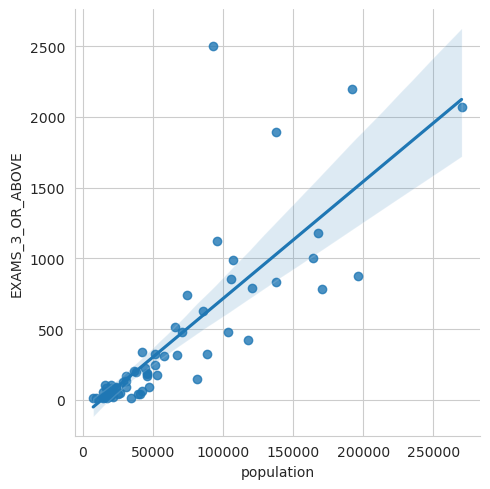

In [51]:
sns.lmplot(data=wisconsin22[wisconsin22['population']<300000],y='EXAMS_3_OR_ABOVE',x='population') # We truncate the data otherwise the high population counties make the plot difficult to interpret.

As we can see, EXAMS_3_OR_ABOVE and population are strongly positively correlated. Analogous plots can be created for the 'STUDENTS_TESTED' and 'EXAM_COUNT' columns as well.

In [11]:
## Features indicated by shapley to be significant
significant_features = ['per_capita_income','population','closest_five_private_nfp_avg','closest_five_avg_dormrooms_private_nfp','closest_five_public_avg']

### We will not create the plots for more significant features (as indicated by shapley) via plotly and save them as pickle file.

In [39]:

fig = go.Figure(data=go.Scatter(
    x=np.round(wisconsin22['per_capita_income'], decimals=-1),
    y=np.round(wisconsin22['PERCENT_3_OR_ABOVE'], decimals=1),
    mode='markers',
    marker=dict(
        size=7,
        color=wisconsin22['PERCENT_3_OR_ABOVE'],
        colorscale='Bluered',
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=wisconsin22['COUNTY'],
    name=''))
fig.show()

In [ ]:
fig = px.scatter(data_frame=wisconsin22,x='per_capita_income', y='PERCENT_3_OR_ABOVE',trendline='lowess',trendline_color_override='darkblue',width=800, height=600,color='PERCENT_3_OR_ABOVE',
                 title='Pass rate vs Per Capita Income 2022-23')
fig.show()
with open('../data/WI_pickled/WI_AP_pass_rate_by_counties_vs_income.pkl', 'wb') as f:
    pickle.dump(fig, f)

There is a clear positive relationship between pass rate and per capita income. While the lowess-fitted line is not linear, if we exclude the couple of data points with highest per capita income, it looks kinda linear.

In [ ]:
fig = px.scatter(data_frame=wisconsin22,x='population', y='PERCENT_3_OR_ABOVE',trendline='ols',trendline_color_override='darkblue',width=800, height=600,color='PERCENT_3_OR_ABOVE',title='Pass rate vs Population')
fig.show()
with open('../data/WI_pickled/WI_AP_pass_rate_by_counties_vs_population.pkl', 'wb') as f:
    pickle.dump(fig, f)

While there is slight positive relationship between population and pass rate, it's not as clear cut as it was with pass rate vs income.

In [ ]:
fig = px.scatter(data_frame=wisconsin22,x='closest_five_public_avg', y='PERCENT_3_OR_ABOVE',trendline='ols',trendline_color_override='darkblue',width=800, height=600,
                 color='PERCENT_3_OR_ABOVE',title='Pass rate vs Avg. distance to closest 5 public universities')
fig.show()
with open('../data/WI_pickled/WI_AP_pass_rate_by_counties_vs_avg._dist_public.pkl', 'wb') as f:
    pickle.dump(fig, f)

The trendline has negative slope. So, counties that are farther from public universities tend to have lower AP pass rate, which is what we would expect.

In [ ]:
fig = px.scatter(data_frame=wisconsin22,x='closest_five_private_nfp_avg', y='PERCENT_3_OR_ABOVE',trendline='ols',trendline_color_override='darkblue',width=800, height=600,
                 color='PERCENT_3_OR_ABOVE',title='Pass rate vs Avg. distance to closest five private universities')
fig.show()
with open('../data/WI_pickled/WI_AP_pass_rate_by_counties_vs_avg_five_private.pkl', 'wb') as f:
    pickle.dump(fig, f)

Albeit less pronounced than that against public universities, the pass rate still seems to be slightly negatively correlated to average distance to the closest five private universities.

In [ ]:
fig = px.scatter(data_frame=wisconsin22,x='closest_five_avg_dormrooms_private_nfp', y='PERCENT_3_OR_ABOVE',trendline='ols',trendline_color_override='darkblue',width=800, height=600,
                 color='PERCENT_3_OR_ABOVE',title='Pass rate vs Avg. no. of dormrooms in the closest five private universities')
fig.show()
with open('../data/WI_pickled/WI_AP_pass_rate_by_counties_vs_avg_five_private_dormrooms.pkl', 'wb') as f:
    pickle.dump(fig, f)